# Data Minig Project
### Prediction of Forest Fires at the Montesinho National Park (Protugal) using machine learning
#### Klaus Konadu-Finke

#  

#  

# Research Question

What is the predicted area burned by forest fires in the Montesinho national park given input variables of the climate?

# Research Tools

-Microsoft Excel
-Python using Jupyter notebook
-Mozilla Firefox

# Expected Results/ Hypothesis

The hypothesis or the expected results is a prediction of the final outcome. Its statement goes as follows:
The higher the temperature and the lower the humidity in the given area of the park, the bigger the area burned by forest fire.

# Learning Goals

In this project the aim is to predict the output value y from input value x
The prediction on the likelihood of forest fires (input y) in the Montesinho national park in Portugal is based on the input x which is the temperature and the humidity. Using a machine learning approach in python, the data is first loaded and then the model is trained to predict to predict the area of a forest fire from the temperature and humidity.  

# Data Gathering

The forest fire data set was obtained from the machine learning repository (http://archive.ics.uci.edu/ml/datasets/Forest+Fires) and is provided as a CSV file.
It shows amongst others the temperature in Celsius, the relative humidity of the air in percentage the wind speed in km/h, rain in mm/m2 and area burned in acres.


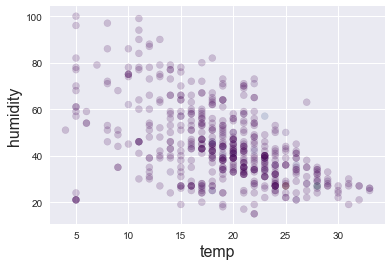

the desity shows the area


In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd

data = np.genfromtxt('forestfires_short.csv', delimiter=";", \
                     names=True)

x = data['temp']
y = data['RH']

z = data['area']
prediction = []

#xnorm = np.genfromtxt('forestfires_short_x.csv', delimiter=";")
#ynorm = np.genfromtxt('forestfires_short_y.csv', delimiter=";")

isSizeSame = None

def chk_size(x, y, isSizeSame):
    # Check x and y are equal in size
    if not len(x) == len(y):
        isSizeSame == False
        print('size is not the same')
    else:
        isSizeSame == True
        
chk_size(x, y, isSizeSame)
#if isSizeSame == True:        
#plt.scatter(x,y)
plt.xlabel('Temp in C', fontsize=16)
plt.ylabel('Humidity in %', fontsize=16)


plt.scatter(data['temp'], y, alpha=0.2, c=z, cmap='viridis')
plt.xlabel('temp')
plt.ylabel('humidity');
plt.show()
print('the desity shows the area')

In [2]:
#Activation functions
def sigmoid(z):
     #Apply sigmoid activation function to scalar, vector, or matrix
    t = 1/(1+np.exp(-z))
    return t


def sigmoidPrime(z):
    #Derivative of sigmoid function
    tp = np.exp(-z)/((1+np.exp(-z))**2)
    return tp

Trying out the Polynomial Model for computing the prodiction:

In [16]:


from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(3, include_bias=False)
xfit = poly.fit_transform(x[:, None])



In [22]:

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),
                           LinearRegression())



The results did not give andy convincing output probably due to the high variance in the input (learning) data

[ 64.6140422   45.20457657  49.88797425  64.6140422   60.61844472
  40.34441057  36.4870352   64.6140422   54.95534948  38.54711789
  45.20457657  44.13909854  46.42798031  41.83767529  32.14616261
  38.54711789  49.88797425  46.42798031  47.95633588  64.3885989
  45.20457657  44.13909854  41.83767529  43.06693012  36.4870352
  47.95633588  44.13909854  44.13909854  27.99221817  38.54711789
  34.28866276  60.61844472  41.83767529  45.20457657  41.83767529
  45.20457657  40.34441057  60.61844472  45.20457657  52.24539334
  38.54711789  45.20457657  46.42798031  43.06693012  54.95534948
  32.14616261  49.88797425  38.54711789  57.8394408   60.61844472
  41.83767529  40.34441057  43.06693012  43.06693012  45.20457657
  28.9367879   45.20457657  52.24539334  52.24539334  57.8394408
  57.8394408   60.61837165  44.13909854  41.83767529  38.54711789
  44.13909854  38.54711789  43.06693012  43.06693012  46.42798031
  47.95633588  45.20457657  47.95633588  46.42798031  28.9367879
  63.36013527 

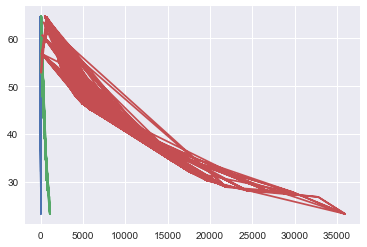

In [29]:
poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(x[:, np.newaxis])

#plt.scatter(x, y)
plt.plot(xfit, yfit);
print(yfit)

Next the linear regression model is tried, since
"In linear regression, each predicted value is assumed to have been picked from a normal distribution of possible values"
(https://stats.stackexchange.com/questions/148803/how-does-linear-regression-use-the-normal-distribution).
The first graph illustrated  shows a clustering resembling a normal distribution

In [30]:
from sklearn.linear_model import Ridge


def predictModel(a , b):
    model = LinearRegression(fit_intercept=False)
    X = np.array([data[a]])
    Y = np.array([data[b]])
    model.fit(X, Y)
    #data['area'] = model.predict(Y)
    data['area'] = model.predict(X)
    prediction = model.predict(X)
    return model.predict(Y)
    

Input = 'temp'
toPredict = 'area'

predicted = predictModel(Input, toPredict)
#predictedModel = model.predict(Y)

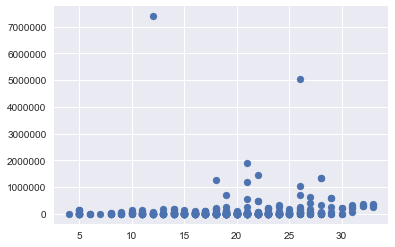

In [47]:
predicted = predictModel(Input, toPredict)
#predicted = sigmoid(predicted)
plt.scatter(x, np.sort(predicted[0,:]))
#plt.plot(x, np.sort(predicted[0,:]), '-o')
plt.show()

In [46]:
def computeAccuacy(y, yHat):
    count = 0;
    true = 0;
    # Compare given lists and ++ true if list_y == list_yHat
    for i in range(len(y)):
        count +=1
        if(y[i] == yHat[i]):
            true +=1
    print('the accuacy of the prediction is:')
    return 100 * (true / count)

computeAccuacy(y, predicted[0,:])

the accuacy of the prediction is:


0.0

the accuracy is 0.0%
this is probably to either too few correlating attributes (currently only used 1 - temperature) for comtping a good enough estimate,lack of quality or quantity of the training dataset.
Another reason for a 0% accuracy might be that the wrong estimation model is used in relation to the used dataset.

proceeding steps

1. Implement another input -> Humidity 
2. change the model in case another input layer is not sufficient (Deciision tree) for at least computing if there will be a fire or not with the given inputs


Further improvement
- remove outliers

Future steps
- compare test results 
    
https://github.com/stephencwelch/Neural-Networks-Demystified/blob/master/Part%204%20Backpropagation.ipynb

Conclusion

The calculation of the model could not be completed, due to incomprehensive and constantly changing results. From the inputs and the visualizations, it can be seen that there are a fairly big amount of outliers. This hints that there might not be a strong relation between the given attributes (temperature, humidity, wind, rain & burned area). It can also be concluded that there might also be other factors influencing the amount of forest fires for example due to human interaction (lit cigarette buds, thrown away glass bottles etc.).
The future steps will be cutting the outliers and concentrating on the cluster which contain the greatest burned areas and use a different approach in predicting the result. Here, the research question must also be adjusted to: if there is a forest fires with the given values or not?
Then a different algorithm can be chosen for training the model. A good solution in this new case would be a decision tree.


Reflection

The input x and output y data was scaled and separated using Excel. This could however be done in python but the developing environment made debugging difficult. Excel was the quickest solution for developing. The data was then 

using python in the jupyter notebook made me appreciate java and netbeans even more. The use of the developing environment gave me no feedback at all until running the lines of code. I would appreciate colour coding, code completion and all these nifty little features which make developing as a Business Informatics student less painful. 
Debugging the code in python was cumbersome and tedious. Until code execution, Jupyter offered features very similar to notepad.
If I could do the project again I would chose a different model. Instead of a regression model where I predict the quantity, a decision tree would be more suitable to determine whether there will be a fire or not, as there are many factors which play a role in the actual size of the fire. A less complicated but evenly effective prediction is to wheather there will be a fire or not.
, I would of cause start earlier, if time allows it and use a different language. Experiencing python was a lesson learned and I can say that, as for now, if I have a choice I would chose Java over python. Not because of the syntax, but because of the, for me known developing environment and its possibilities. 
A positive thing I found in python using Jupyter is that the markdown fields offer a very nice solution in creating comments and for establishing an overview on the different code sections.
